In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [130]:
a=pd.read_csv(r'D:/New folder/abc/merged.csv')

In [131]:
a.head(2)

,Order ID,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4


In [ ]:
a.info()

In [132]:
a['Order Date']=pd.to_datetime(a['Order Date'])
a['Ship Date']=pd.to_datetime(a['Ship Date'])

In [133]:
a['O_day'] = a['Order Date'].dt.day           ### Creating three new columns from order date column 
a['O_year'] = a['Order Date'].dt.year
a['O_month'] = a['Order Date'].dt.month       ### These columns will help us in understanding relation between shipping days and order day,year and month 

In [134]:
a.rename(columns={'Actual Discount':'Actual_Discount','Sub-Category':'Sub_category','Ship Mode':'Ship_Mode','Product Name':'Product_Name','Days to Ship':'Days_to_ship'},inplace=True)

In [135]:
### Now, I am deleting some of the columns from the dataset which seems of no use to me. 
a.drop(['Order ID','Ship Date','Order Date','Customer Name'],axis=1,inplace=True)

In [81]:
a.describe()

,Discount,Actual_Discount,Sales,Profit,Quantity,Days_to_ship,O_day,O_year,O_month
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,0.110047,29.793078,291.845657,35.198211,3.772089,4.007332,15.897353,2014.731080,7.352802
std,0.181773,88.817656,485.212156,178.125844,2.203369,1.741232,8.749967,1.100474,3.326043
min,0.000000,0.000000,3.000000,-3060.000000,1.000000,0.000000,1.000000,2013.000000,1.000000
25%,0.000000,0.000000,48.000000,1.000000,2.000000,3.000000,8.000000,2014.000000,5.000000
50%,0.000000,0.000000,117.000000,14.000000,3.000000,4.000000,16.000000,2015.000000,8.000000
75%,0.100000,22.000000,313.000000,47.000000,5.000000,5.000000,24.000000,2016.000000,10.000000
max,0.850000,1700.000000,6517.000000,2476.000000,14.000000,7.000000,31.000000,2016.000000,12.000000


In [50]:
a_corr=a.corr(numeric_only=True)

<Axes: >

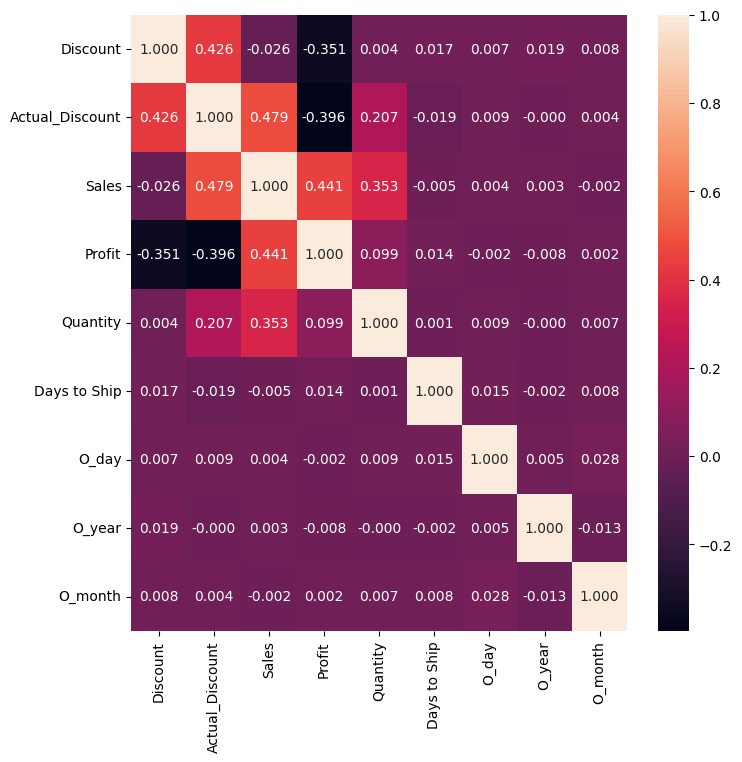

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(a_corr,annot=True,fmt=".3f")

In [ ]:
value_counts_dict = {}

# Iterate through each column in the DataFrame
for column in a.columns:
    value_counts = a[column].value_counts()
    value_counts_dict[column] = value_counts

# Print the value counts for each column
for column, counts in value_counts_dict.items():
    print(f"Value counts for column {column}:\n{counts}\n")

<Axes: >

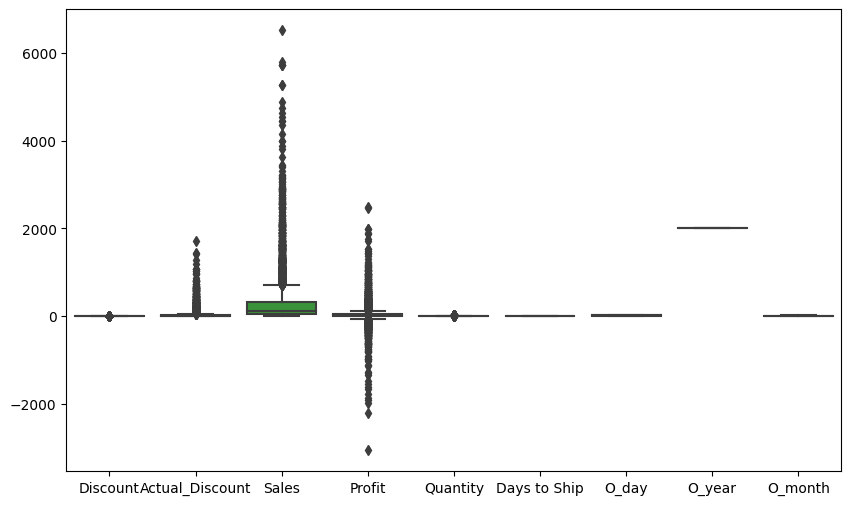

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(a)

### From the above graph, we find that only 3 columns ( Actual Discount, Sales, Profit )are not present with normal distribution so, we will plot those on separate plots 

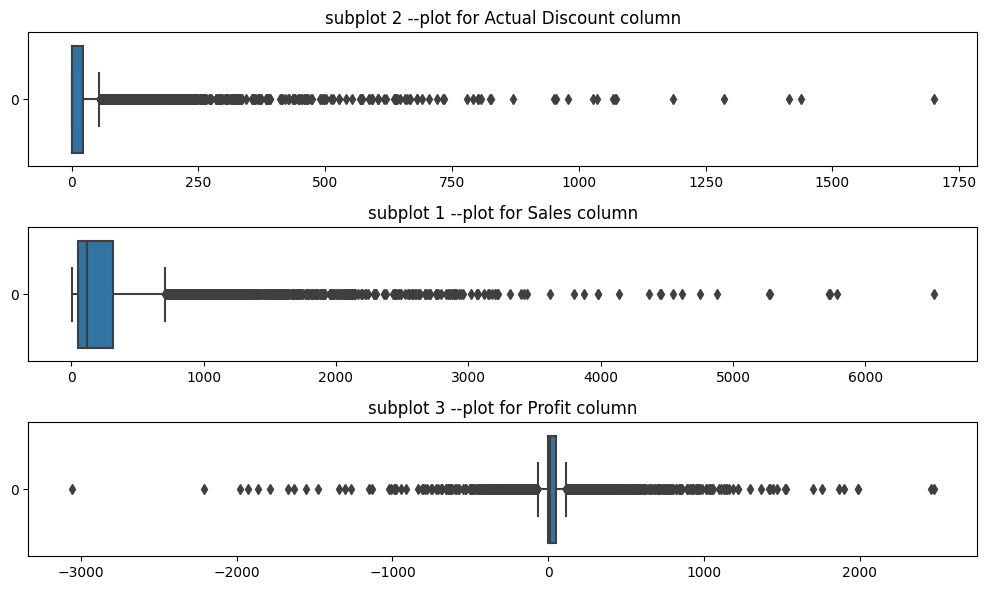

In [53]:
fig, axs = plt.subplots(3, 1, figsize=(10,6))  # 3 rows, 1 column

# Plot data on each subplot

sns.boxplot(a['Actual_Discount'],orient='h', ax=axs[0])
axs[0].set_title('subplot 2 --plot for Actual Discount column')

sns.boxplot(a['Sales'],orient='h', ax=axs[1])
axs[1].set_title('subplot 1 --plot for Sales column')

sns.boxplot(a['Profit'],orient='h', ax=axs[2])
axs[2].set_title('subplot 3 --plot for Profit column')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

#### From the above graph , we will take a distinguishing point for every value which we will use to replace the outliers values 
#### From our dataset, we are replacing outliers more than 99% with the about 99% values

In [136]:
a['Actual_Discount'] = np.where(a['Actual_Discount']>740, 740, a['Actual_Discount'])
a['Sales'] = np.where(a['Sales']>3400, 3400, a['Sales'])
a['Profit'] = np.where(a['Profit']>1350, 1350, a['Profit'])
a['Profit'] = np.where(a['Profit']<-1000, -1000, a['Profit'])

#### As we have removed outliers from the data now it's time to implement different machine learning models 

In [56]:
a.columns

Index(['Product_Name', 'Discount', 'Actual_Discount', 'Sales', 'Profit',
       'Quantity', 'Category', 'Sub_category', 'City', 'Country', 'Region',
       'Segment', 'Ship_Mode', 'State', 'Days to Ship', 'O_day', 'O_year',
       'O_month'],
      dtype='object')

### Selected the dependent and independent features

In [137]:
X = a.drop('Sales', axis=1) # x = df.iloc[:,:-1])
Y = a['Sales']              # y = df.iloc[:,-1])

print(type(X)) #DataFrame
print(type(Y)) #Series

print(X.shape)
print(Y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(8047, 17)
(8047,)


In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.30, random_state = 1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(5632, 17)
(2415, 17)
(5632,)
(2415,)


### Now, as we know many of our dataset has categorical features as well and many of the others are either not standardised or nomalised.
So, we will now create pipeline for to overcome all of these problems 


In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler

In [61]:
a.head(2)

,Product_Name,Discount,Actual_Discount,Sales,Profit,Quantity,Category,Sub_category,City,Country,Region,Segment,Ship_Mode,State,Days_to_ship,O_day,O_year,O_month
0,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper,Stockholm,Sweden,North,Home Office,Economy Plus,Stockholm,4,1,2013,1
1,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases,Southport,United Kingdom,North,Consumer,Economy,England,4,3,2013,1


In [85]:
print(a['Country'].nunique())
print(a['City'].nunique())
print(a['State'].nunique())
print(a['Sub_category'].nunique())
print(a['Product_Name'].nunique())



15
999
127
17
1810


In [140]:
def cat_city_column(values, threshold=100):
    value_counts = values.value_counts()
    top_categories = value_counts[value_counts > threshold].index
    return values.apply(lambda x: x if x in top_categories else 'Other')

In [141]:
a['City'] = cat_city_column(a['City'])

In [142]:
def cat_state_column(values, threshold=150):
    value_counts = values.value_counts()
    top_categories = value_counts[value_counts > threshold].index
    return values.apply(lambda x: x if x in top_categories else 'Other')

In [143]:
a['State'] = cat_state_column(a['State'])

In [144]:
def cat_product_column(values, threshold=15):
    value_counts = values.value_counts()
    top_categories = value_counts[value_counts >= threshold].index
    return values.apply(lambda x: x if x in top_categories else 'Other')

In [145]:
a['Product_Name'] = cat_product_column(a['Product_Name'])

In [146]:
trf1 = ColumnTransformer([
    ('cat_enco',OneHotEncoder(sparse=False,handle_unknown='ignore'),['Category','Region','Segment','Ship_Mode','Country','Sub_category','City','State','Product_Name'])
],remainder='passthrough')

#### The dimensionality of this dataset is quite large, So will not use any standard scaler because it will not be much appropriate here with that much number of columns

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score    

# Function for Regression Evaluation Metrics

A = {'Model' : [], 'MAE' : [], 'MSE' : [], 'R2Score' : []}
def eval_model(model_name, y, ypred) :
  mae = mean_absolute_error(y, ypred)
  mse = mean_squared_error(y, ypred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, ypred)
  print('MAE', mae)
  print('MSE', mse)
  print('RMSE', rmse)
  print('R2 Score', r2)
  A['Model'].append(model_name)
  A['MAE'].append(mae)
  A['MSE'].append(mse)
  A['R2Score'].append(r2)

In [148]:
from sklearn.linear_model import Ridge, Lasso     ### We have imported the libraries for models we will be using 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import BayesianRidge

#### Now, we will be applying our models one by one to our dataset

In [149]:
### Ridge Regressor
Model = Ridge(alpha=5)
pipe_ridge = Pipeline([('preprocessor', preprocessor), ('Model', Model)])
pipe_ridge.fit(x_train, y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model('Ridge Regression', y_test, ypred_ridge)

MAE 102.61919298617714
MSE 34338.30752593256
RMSE 185.30598351357293
R2 Score 0.8141904666088405


In [150]:
### Lasso Regressor
Model = Lasso(alpha=0.1)
pipe_lasso = Pipeline([('trf1', trf1), ('Model', Model)])
pipe_lasso.fit(x_train, y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model('Lasso Regression', y_test, ypred_lasso)

MAE 99.04080615055499
MSE 34725.712591661875
RMSE 186.34836353362988
R2 Score 0.8120941619368012


In [151]:
### Decision Tree Regressor
Model = DecisionTreeRegressor(max_depth=8, min_samples_split=15)
pipe_dt = Pipeline([('trf1', trf1), ('Model', Model)])
pipe_dt.fit(x_train, y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model('Decision Tree Regressor', y_test, ypred_dt)

MAE 100.15530192491116
MSE 42269.795539284445
RMSE 205.5961953424344
R2 Score 0.771272041297823


In [152]:
### Ramdom Forest Regressor
Model = RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_split=11, random_state=5)
pipe_rf = Pipeline([('trf1', trf1), ('Model', Model)])
pipe_rf.fit(x_train, y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model('Random Forest Regressor', y_test, ypred_rf)

MAE 88.68303407395499
MSE 33807.69369544188
RMSE 183.86868601108205
R2 Score 0.8170616945568083


In [153]:
### Extra Trees Regressor
model = ExtraTreesRegressor(n_estimators=10)
pipe_ETR = Pipeline([('trf1', trf1), ('model', model)])

# Train the model using the training data
pipe_ETR.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_ETR.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
eval_model('Extra Trees Regressor', y_test, predictions)

Mean Squared Error: 24856.65950724638
MAE 56.7575569358178
MSE 24856.65950724638
RMSE 157.65994896373135
R2 Score 0.8654970312320615


In [154]:
### Light Gradient Boosting Regressor
model = lgb.LGBMRegressor() # Use LGBMRegressor for regression tasks 

pipe_GBM = Pipeline([('trf1', trf1), ('model', model)])

# Train the model using the training data
pipe_GBM.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_GBM.predict(x_test)

eval_model('Light Gradient Booster', y_test, predictions)

MAE 68.312219083018
MSE 24668.88500914327
RMSE 157.06331528763573
R2 Score 0.866513106117201


In [155]:
### Huber Regressor
model = HuberRegressor(epsilon=1.35) # Use LGBMRegressor for regression tasks 

pipe_hbr = Pipeline([('trf1', trf1), ('model', model)])

# Train the model using the training data
pipe_hbr.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_hbr.predict(x_test)

eval_model('Huber Regressor', y_test, predictions)

MAE 106.59162577030645
MSE 56303.531850359934
RMSE 237.28365272466607
R2 Score 0.6953334705419338


In [156]:
### Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size at each iteration
    max_depth=3,  # Maximum depth of individual trees
    # loss='ls'  # Loss function to optimize ('ls' stands for least squares)
)
pipe_gbr = Pipeline([('trf1', trf1), ('model', model)])

# Train the model using the training data
pipe_gbr.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_gbr.predict(x_test)

eval_model('Gradient Booster', y_test, predictions)

MAE 88.23294962691392
MSE 31303.383960538387
RMSE 176.92762350898852
R2 Score 0.8306128756381106


In [160]:
model = BayesianRidge()
pipe_br = Pipeline([('trf1', trf1), ('model', model)])

# Train the model using the training data
pipe_br.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_br.predict(x_test)

eval_model('Bayesian Ridge', y_test, predictions)

MAE 97.01318124516507
MSE 29958.41137448617
RMSE 173.08498309930349
R2 Score 0.8378907162378411


In [111]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
# Create KNN Regressor
model = KNeighborsRegressor(n_neighbors=3) # Specify the number of neighbors

pipe_knn = Pipeline([('trf1', trf1), ('model', model)])

# Train the model using the training data
pipe_knn.fit(x_train, y_train)

# Make predictions on the test set
predictions = pipe_knn.predict(x_test)

eval_model('KNN reg', y_test, predictions)

MAE 111.24182194616978
MSE 54966.78771566598
RMSE 234.44996847017484
R2 Score 0.7025667858048739


In [162]:
model_performance = pd.DataFrame(A)
model_performance.T

,0,1,2,3,4,5,6,7,8,9
Model,Ridge Regression,Lasso Regression,Decision Tree Regressor,Random Forest Regressor,Extra Trees Regressor,Light Gradient Booster,Huber Regressor,Gradient Booster,Bayesian Ridge,KNN reg
MAE,102.619193,99.040806,100.155302,88.683034,56.757557,68.312219,106.591626,88.23295,97.013181,111.241822
MSE,34338.307526,34725.712592,42269.795539,33807.693695,24856.659507,24668.885009,56303.53185,31303.383961,29958.411374,54966.787716
R2Score,0.81419,0.812094,0.771272,0.817062,0.865497,0.866513,0.695333,0.830613,0.837891,0.702567


#### Conclusion :-
-- Based on the R2 score our Extra Trees Regressor and Light Gradient Booster both models are best
And we will be taking Extra Trees Regressor for further use  

### Saving and loading the model to test for the sample dataset

In [163]:
import pickle
pickle.dump(pipe_ETR, open('sales.pkl', 'wb'))    # Saving the best performing model
pickle.dump(a, open('data.pkl', 'wb'))                # Saving the DataFrame

In [164]:
### Loading the model 
loaded_model = pickle.load(open('sales.pkl', 'rb'))   # rb = read binary

In [169]:
new_df = a.sample(20)
print(new_df.shape)
new_df.head()

(20, 18)


,Product_Name,Discount,Actual_Discount,Sales,Profit,Quantity,Category,Sub_category,City,Country,Region,Segment,Ship_Mode,State,Days_to_ship,O_day,O_year,O_month
5121,Other,0.0,0.0,198,63,8,Office Supplies,Art,Other,United Kingdom,North,Corporate,Priority,England,2,20,2015,11
3028,Other,0.4,230.8,577,-385,7,Office Supplies,Storage,Other,Italy,South,Consumer,Economy,Other,4,17,2014,11
5333,Other,0.0,0.0,110,38,2,Office Supplies,Art,Other,United Kingdom,North,Consumer,Economy,Other,6,19,2015,12
5992,Other,0.1,6.6,66,22,3,Office Supplies,Art,London,United Kingdom,North,Consumer,Economy Plus,England,2,21,2016,4
397,Other,0.1,60.8,608,189,4,Furniture,Bookcases,London,United Kingdom,North,Consumer,Economy,England,7,26,2013,5


In [170]:
# Selecting the Dependent Featurtes and Generating the Predictions

new_x = new_df.drop('Sales', axis=1) # new_x = df.iloc[:,:-1])
new_ytest = new_df['Sales']          # new_ytest =df.iloc[:,-1]
print(new_x.shape)

best_pred = loaded_model.predict(new_x)
print(eval_model('Best Model', new_ytest, best_pred))


(20, 17)
MAE 26.025
MSE 2495.1954999999994
RMSE 49.9519318945724
R2 Score 0.9792001951277295
None


In [168]:
# Printing the Predicted Results
res = pd.DataFrame(new_x)
res['Sales'] = best_pred.round(decimals=0)
res

,Product_Name,Discount,Actual_Discount,Profit,Quantity,Category,Sub_category,City,Country,Region,Segment,Ship_Mode,State,Days_to_ship,O_day,O_year,O_month,Sales
3466,"BIC Highlighters, Water Color",0.00,0.00,4,1,Office Supplies,Art,Other,France,Central,Consumer,Economy,Other,6,2,2015,2,22.0
2990,Other,0.10,69.70,-23,7,Technology,Machines,Madrid,Spain,South,Consumer,Economy,Madrid,4,13,2014,11,667.0
324,Other,0.00,0.00,11,4,Office Supplies,Labels,Other,Germany,Central,Home Office,Economy,North Rhine-Westphalia,4,4,2013,5,27.0
3422,Other,0.10,3.90,9,1,Furniture,Furnishings,Berlin,Germany,Central,Home Office,Economy Plus,Berlin,5,20,2015,1,40.0
3037,Other,0.00,0.00,8,2,Office Supplies,Art,Other,Germany,Central,Home Office,Economy,Other,4,20,2014,11,29.0
7917,Other,0.15,144.75,-68,3,Technology,Copiers,Other,France,Central,Corporate,Economy,Auvergne-Rhône-Alpes,4,19,2016,12,902.0
4753,Other,0.10,46.20,92,4,Office Supplies,Storage,London,United Kingdom,North,Home Office,Economy,England,4,18,2015,9,462.0
5161,Other,0.00,0.00,6,3,Office Supplies,Fasteners,Other,Germany,Central,Corporate,Economy,Other,7,23,2015,11,36.0
2599,Other,0.00,0.00,9,1,Office Supplies,Envelopes,Vienna,Austria,Central,Consumer,Immediate,Vienna,0,5,2014,9,32.0
3685,Other,0.10,78.50,270,2,Furniture,Bookcases,Other,Germany,Central,Consumer,Economy,Other,6,24,2015,3,797.0
